## Домашнее задание
 Задание 1

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import warnings

np.random.seed(0)

In [6]:
from sklearn.base import BaseEstimator

class LinearRegressionSGD(BaseEstimator):
    def __init__(self, epsilon=1e-6, max_steps=10000, w0=None, alpha=1e-8):
        self.epsilon = epsilon
        self.max_steps = max_steps
        self.w0 = w0
        self.alpha = alpha
        self.w = None
        self.w_history = []
    
    def fit(self, X, y):
        l,d = X.shape 
        if self.w0 is None:
            self.w0 = np.zeros(d)
        self.w = self.w0
        for step in range(self.max_steps):
            self.w_history.append(self.w)
            w_new = self.w - self.alpha * self.calc_gradient(X, y)
            if (np.linalg.norm(w_new - self.w) < self.epsilon):
                break
            self.w = w_new
        return self
    
    def predict(self, X):
        if self.w is None:
            raise Exception("Пока не обучена")
        l, d = X.shape
        y_pred = []
        for i in range(l):
            y_pred.append(np.dot(X[i], self.w))
        return np.array(y_pred)
    
    def calc_gradient(self, X, y):
        l, d = X.shape
        gradient = np.zeros((d, ))
        indeces = np.random.randint(0, d, (10, ))
        return (2/l) * np.dot(X.T,(np.dot(X, self.w) - y))

In [7]:
def plot_gd(X, y, w_history):
    # compute level set
    A, B = np.meshgrid(np.linspace(-3, 3, 100), np.linspace(-3, 3, 100))

    levels = np.empty_like(A)
    for i in range(A.shape[0]):
        for j in range(A.shape[1]):
            w_tmp = np.array([A[i, j], B[i, j]])
            levels[i, j] = np.mean(np.power(np.dot(X, w_tmp) - y, 2))

    plt.figure(figsize=(13, 9))
    plt.title('GD trajectory')
    plt.xlabel(r'$w_1$')
    plt.ylabel(r'$w_2$')
    plt.xlim((-2.1, 2.1))
    plt.ylim((-2.1, 2.1))

    # visualize the level set
    CS = plt.contour(A, B, levels, levels=np.logspace(0, 2, num=10), cmap=plt.cm.rainbow_r)
    CB = plt.colorbar(CS, shrink=0.8, extend='both')

    # visualize trajectory
    w_list = np.array(lr.w_history)
    plt.scatter(w_true[0], w_true[1], c='r', marker='*')
    plt.scatter(w_list[:, 0], w_list[:, 1])
    plt.plot(w_list[:, 0], w_list[:, 1])
    plt.show()

In [15]:
n_features = 2
n_objects = 300
num_steps = 100

np.random.seed(10)
w_true = np.random.normal(0, 0.1, size=(n_features, ))
w_0 = np.random.uniform(-2, 2, (n_features))

X = np.random.uniform(-5, 5, (n_objects, n_features))
y = np.dot(X, w_true) + np.random.normal(0, 1, (n_objects))

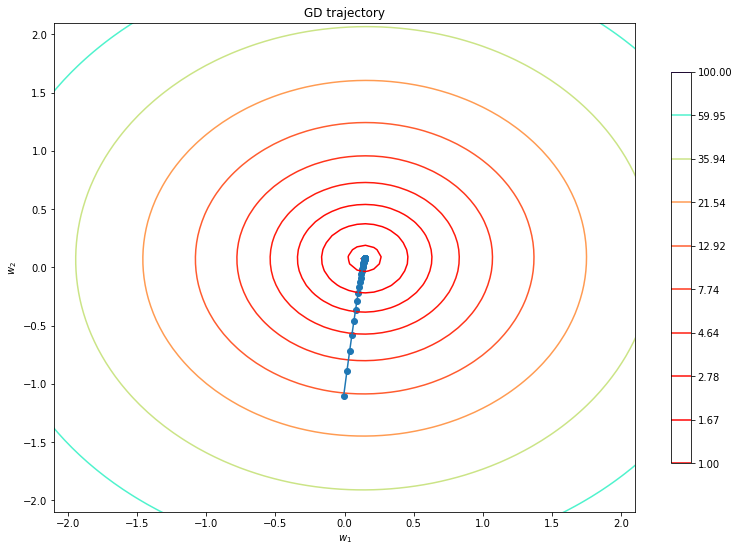

In [16]:
lr = LinearRegressionSGD(w0=w_0, alpha=0.01)
lr.fit(X, y)

plot_gd(X, y, lr.w_history)
